# SVM for **classification**

Load IRIS dataset, check its contents:

In [6]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)#  the dataset has 4 features (0,1,2,3)
print(iris.data[0:5,:])# each row represents a flower, and each column its features
print(iris.target)#  the targets or labels in the dataset are the classes of flowers we have, in our case, we have 3 different kind of flowers (0,1,2)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split data into training and testing parts:

In [20]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 4)
(120, 4)
(30, 4)
(120,)
(30,)


Use a Support Vector Machine for classification:

In [9]:
from sklearn.svm import SVC
# we can choose different kernels, but for this first approach, the linear is the best one, because we want to split the data into two regions
SVMmodel=SVC(kernel='linear')
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

Choose only first two features (columns) of iris.data
SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

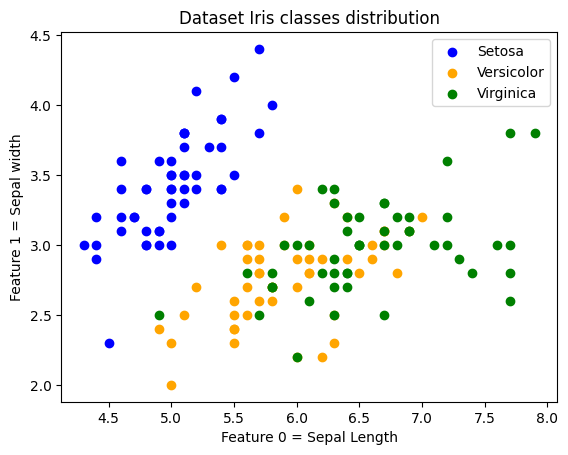

In [34]:
import matplotlib.pyplot as plt
# as we have 4 features, we cannot plot a 4D graph, nor a 3D becuase it will be really hard to find the line for splitting the data, so we only plot 2 features (0,1)
plt.scatter(X[y==0,0], X[y==0,1], label='Setosa', color='blue')
plt.scatter(X[y==1,0], X[y==1,1], label='Versicolor', color='orange')
plt.scatter(X[y==2,0], X[y==2,1], label='Virginica', color='green')
# from the iris.data, we only take the flowers that are present in the 3 classes iris.target (0,1,2), but only with the 2 first features (0,1)

plt.legend()
plt.title("Dataset Iris classes distribution")
plt.xlabel("Feature 0 = Sepal Length")
plt.ylabel("Feature 1 = Sepal width")
plt.show()

 As 1 and 2 classes are mixed, we are going to delete the 2 classes

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [13]:
X = iris.data[iris.target!=2,0:2]
y = iris.target[iris.target!=2]
SVMmodel1_1 = SVC(kernel='linear')
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.2)
SVMmodel1_1.fit(X_train_1,y_train_1)
SVMmodel1_1.score(X_test_1,y_test_1)

1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[5.2 3.4]
 [4.5 2.3]
 [5.1 3.3]
 [4.8 3. ]
 [4.9 3. ]
 [5.  3.2]
 [5.  3. ]
 [5.5 3.5]
 [5.4 3.4]
 [5.6 2.9]
 [5.4 3. ]
 [5.2 2.7]
 [6.  3.4]
 [5.7 3. ]
 [4.9 2.4]
 [5.6 3. ]
 [5.  2.3]]
[[ 2.22221847 -2.21798298]]
[-5.01298021]


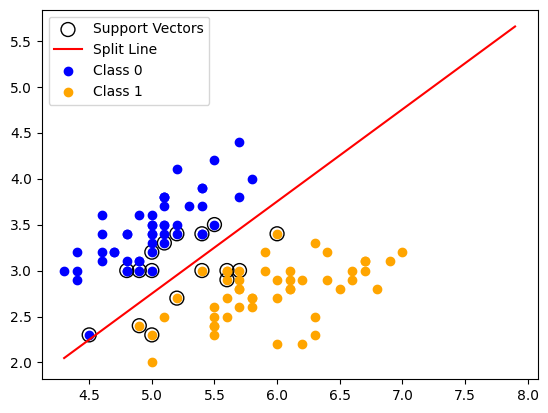

In [38]:
import numpy as np
import matplotlib.pyplot as plt
# the support vectors are the  closest points in the decision region and they define where is the split line

supvectors=SVMmodel.support_vectors_
# Plot the support vectors here
print(supvectors)
plt.scatter(supvectors[:,0], supvectors[:,1], s=100, facecolors='none', edgecolors='black', label='Support Vectors')

#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W)
print(b)
#The equation for linear Kernel SVM is ->
#w1*x1+w2*x2+b=0
#x2=-(b+w1*x1)/w2

# we generate a range of values that are inside the region of the data, that is why we use the min and max for the first feature (0)
x1 = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2=-(b+W[0,0]*x1)/W[0,1]
plt.plot(x1, x2, color='red', label='Split Line')
plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0')
plt.scatter(X[y==1,0], X[y==1,1], color='orange', label='Class 1')
plt.legend()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):



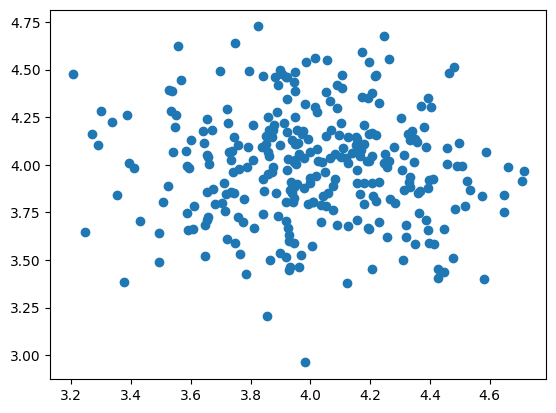

In [31]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)# Etablish the seed for the random data generation. This ensures that each time we run the code, we will obtain the same points
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))
# center means how many groups of different classes we will have
# cluster_std is the standar deviation so if it is small, the points will be concentrated around the center, if not they will be scattered
plt.scatter(x[:,0], x[:,1])
plt.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

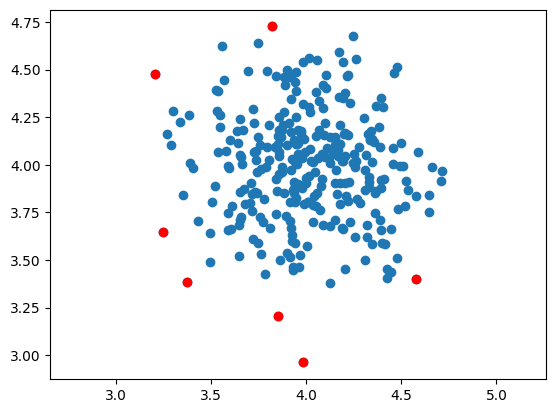

In [47]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
# gamma controls the "radious" of the function if it is a small value, the limit of the circle will be extensive, if gamma is big, the limit will be really small and that can lead to errors
# nu controls the number of the outliers points
# rbf is the radial basis function, we have changed the kernel because now for separating the points we will need something different
#Thus, a circle is the best approach
SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

Plot the support vectors:

[[3.85463046 3.20400443]
 [4.24554653 4.67363469]
 [3.20576064 4.47847741]
 [4.47941497 4.51111655]
 [3.82382713 4.72625839]
 [3.3759303  3.38448149]
 [3.98286354 2.96191517]
 [3.55773919 4.62591332]
 [4.71389792 3.96511489]
 [4.57987163 3.40192854]]


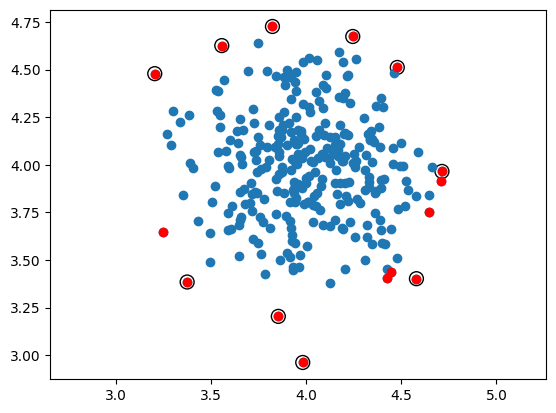

In [52]:
supvectors1=SVMmodelOne.support_vectors_
# Plot the support vectors here
print(supvectors1)
plt.scatter(supvectors1[:,0], supvectors1[:,1], s=100, facecolors='none', edgecolors='black', label='Support Vectors')
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

[8.99063465 8.99300428 8.99290219 8.99308932 8.99287725 8.99224546
 8.99192747 8.99093982 8.99123656 8.99346251 8.99378065 8.99326896
 8.98852384 8.99139379 8.9928401  8.99303212 8.99279775 8.99360495
 8.99153804 8.99216588 8.99369654 8.99307517 8.98938572 8.99373321
 8.99312613 8.993204   8.9886044  8.99191563 8.9912315  8.99282795
 8.99155749 8.98905544 8.98932157 8.99216386 8.99362614 8.99228798
 8.99332084 8.98864981 8.99184555 8.9907517  8.99073853 8.99349831
 8.99120572 8.99150869 8.9891849  8.99319776 8.99364556 8.99263301
 8.99063551 8.99328656 8.99077771 8.99325037 8.98948146 8.99382188
 8.99331469 8.99362908 8.99344805 8.99309958 8.99166357 8.9937667
 8.99339348 8.99037862 8.99379894 8.99268343 8.99259732 8.99357067
 8.99330268 8.99380425 8.99187829 8.99053004 8.99337305 8.99378421
 8.99365311 8.99367899 8.99079662 8.99110855 8.99199232 8.993301
 8.98655785 8.98868771 8.99202058 8.99071631 8.99292504 8.99224956
 8.99347651 8.99355912 8.99362714 8.99345812 8.99058193 8.9925636

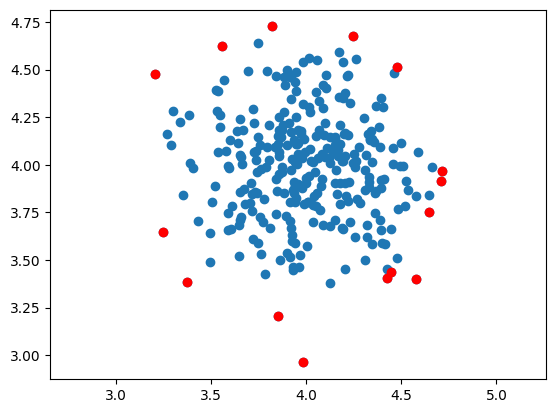

In [53]:
scores = SVMmodelOne.score_samples(x)
print(scores)
thresh = quantile(scores, 0.05)#depending of the percentage of the quantile we will have more or less outliers
print("Threshold=",thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()